In [1]:
from parsing.bonds import Bond
from parsing.deposits import Deposit
%load_ext autoreload

%autoreload 2

import datatable as dt
from metrics.var import calculate, calculate_garch, calculate_historical

from parsing.stocks import get_stocks_history, get_stock_returns, Stock
from parsing.commodities import get_brent_history, Brent
from parsing.rates import get_credit_rates
from parsing.currencies import get_currencies_history, get_currency_returns, Currency
from parsing.indexes import get_indexes_history, get_index_returns
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 14, 'figure.figsize': (12, 8)})

## Процентные ставки

In [22]:
credit_rates = get_credit_rates()

In [42]:
credit_rates_VaR_HS = calculate(returns=credit_rates.rate, calc_func=calculate_historical)
credit_rates_VaR_GARCH = calculate(returns=credit_rates.rate, calc_func=calculate_garch)

/Users/germanarutunov/Projects/ftiad/venv/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.09962. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/germanarutunov/Projects/ftiad/venv/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07869. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/germanarutunov/Projec

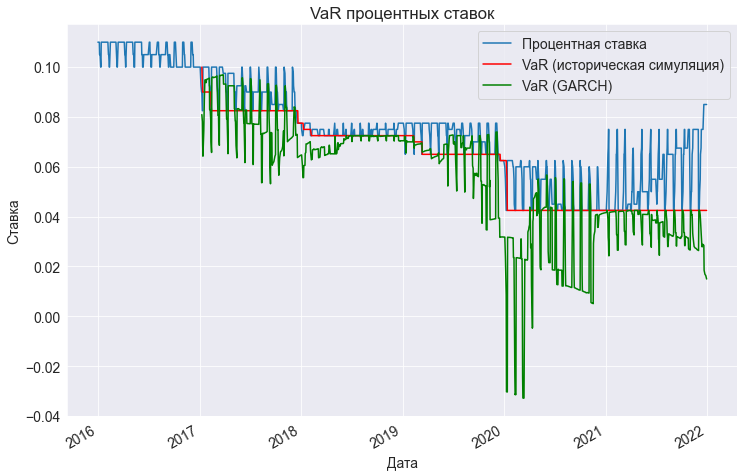

In [43]:
credit_rates.rate.plot(label='Процентная ставка')
(-credit_rates_VaR_HS).plot(c='r', label='VaR (историческая симуляция)')
(-credit_rates_VaR_GARCH).plot(c='g', label='VaR (GARCH)')
plt.title('VaR процентных ставок')
plt.ylabel('Ставка')
plt.xlabel('Дата')
plt.legend()
plt.show()

## Индексы IMOEX и RTSI

### 1 день

In [25]:
index_history = get_indexes_history()
IMOEX_returns = get_index_returns(index_history, 'IMOEX')
RTSI_returns = get_index_returns(index_history, 'RTSI')

In [26]:
IMOEX_VaR_HS = calculate(returns=IMOEX_returns.CLOSE, calc_func=calculate_historical)
IMOEX_VaR_GARCH = calculate(returns=IMOEX_returns.CLOSE, calc_func=calculate_garch)

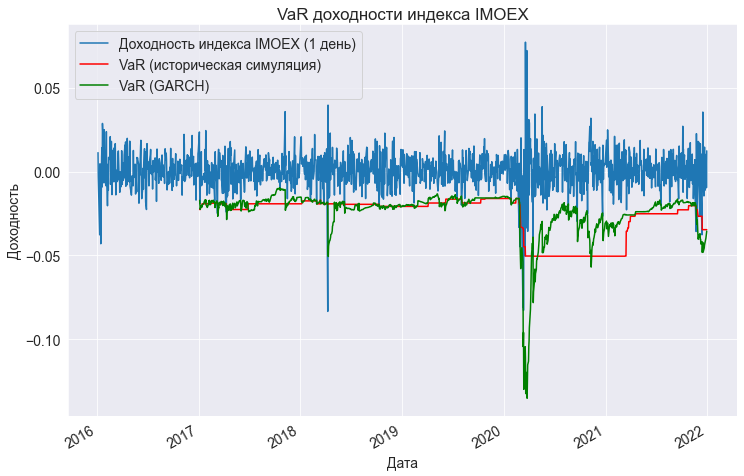

In [32]:
IMOEX_returns.CLOSE.plot(label='Доходность индекса IMOEX')
(-IMOEX_VaR_HS).plot(c='r', label='VaR (историческая симуляция)')
(-IMOEX_VaR_GARCH).plot(c='g', label='VaR (GARCH)')
plt.title('VaR доходности индекса IMOEX (1 день)')
plt.ylabel('Доходность')
plt.xlabel('Дата')
plt.legend()
plt.show()

In [27]:
RTSI_VaR_HS = calculate(returns=RTSI_returns.CLOSE, calc_func=calculate_historical)
RTSI_VaR_GARCH = calculate(returns=RTSI_returns.CLOSE, calc_func=calculate_garch)

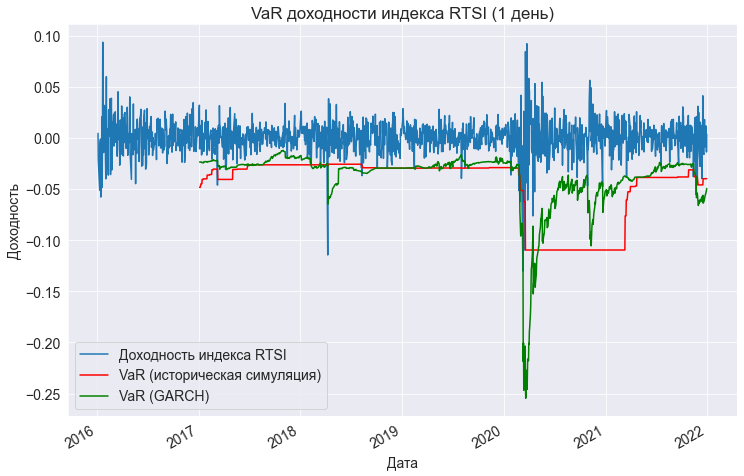

In [36]:
RTSI_returns.CLOSE.plot(label='Доходность индекса RTSI')
(-RTSI_VaR_HS).plot(c='r', label='VaR (историческая симуляция)')
(-RTSI_VaR_GARCH).plot(c='g', label='VaR (GARCH)')
plt.title('VaR доходности индекса RTSI (1 день)')
plt.ylabel('Доходность')
plt.xlabel('Дата')
plt.legend()
plt.show()

### 10 дней

In [37]:
IMOEX_returns_10 = get_index_returns(index_history, 'IMOEX', periods=10)
RTSI_returns_10 = get_index_returns(index_history, 'RTSI', periods=10)

In [38]:
IMOEX_VaR_HS_10 = calculate(returns=IMOEX_returns_10.CLOSE, calc_func=calculate_historical)
IMOEX_VaR_GARCH_10 = calculate(returns=IMOEX_returns_10.CLOSE, calc_func=calculate_garch)

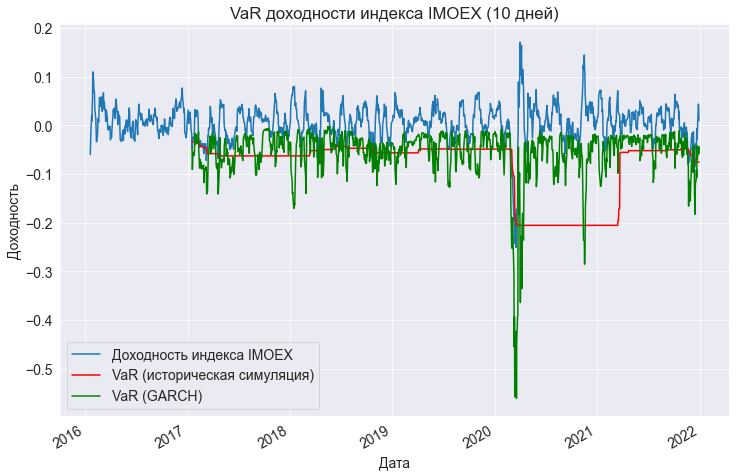

In [39]:
IMOEX_returns_10.CLOSE.plot(label='Доходность индекса IMOEX')
(-IMOEX_VaR_HS_10).plot(c='r', label='VaR (историческая симуляция)')
(-IMOEX_VaR_GARCH_10).plot(c='g', label='VaR (GARCH)')
plt.title('VaR доходности индекса IMOEX (10 дней)')
plt.ylabel('Доходность')
plt.xlabel('Дата')
plt.legend()
plt.show()

In [40]:
RTSI_VaR_HS_10 = calculate(returns=RTSI_returns_10.CLOSE, calc_func=calculate_historical)
RTSI_VaR_GARCH_10 = calculate(returns=RTSI_returns_10.CLOSE, calc_func=calculate_garch)

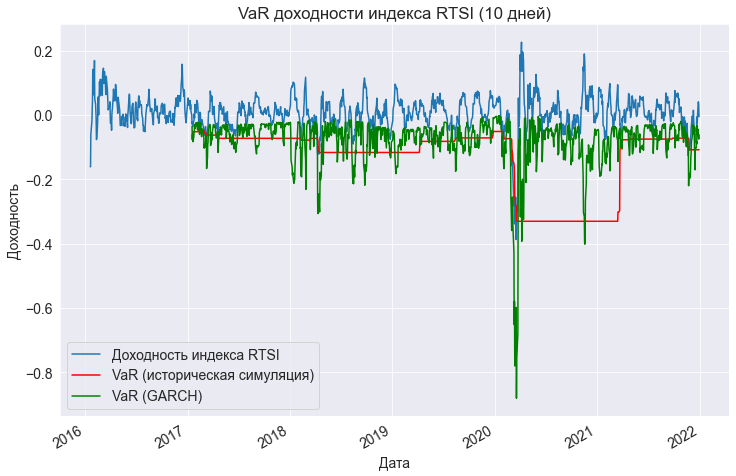

In [41]:
RTSI_returns_10.CLOSE.plot(label='Доходность индекса RTSI')
(-RTSI_VaR_HS_10).plot(c='r', label='VaR (историческая симуляция)')
(-RTSI_VaR_GARCH_10).plot(c='g', label='VaR (GARCH)')
plt.title('VaR доходности индекса RTSI (10 дней)')
plt.ylabel('Доходность')
plt.xlabel('Дата')
plt.legend()
plt.show()

## Курсы валют

### 1 день

In [3]:
currencies_history = get_currencies_history()
USD_RUB = Currency('USD000000TOD')
EUR_RUB = Currency('EUR_RUB__TOD')
CNY_RUB = Currency('CNY000000TOD')

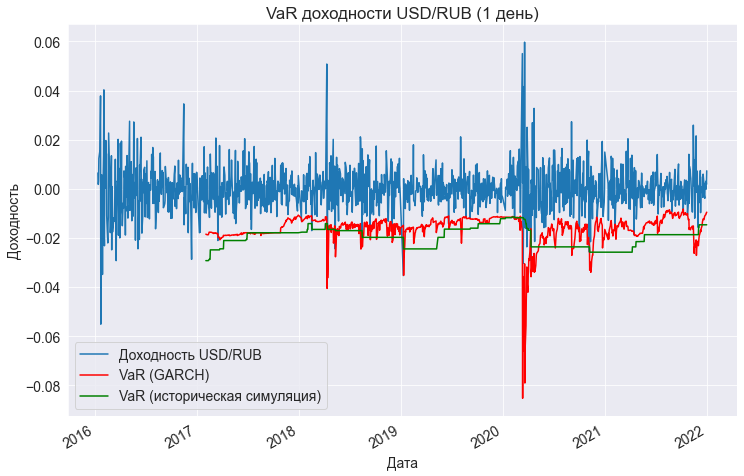

In [70]:
USD_RUB.returns().plot(label='Доходность USD/RUB')
(-USD_RUB.value_at_risk()).plot(c='r', label='VaR (GARCH)')
(-USD_RUB.value_at_risk(calc_func=calculate_historical)).plot(c='g', label='VaR (историческая симуляция)')
plt.title('VaR доходности USD/RUB (1 день)')
plt.ylabel('Доходность')
plt.xlabel('Дата')
plt.legend()
plt.show()

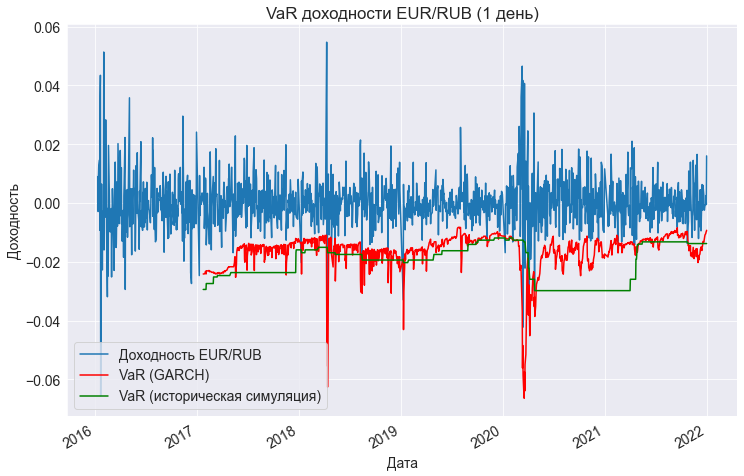

In [71]:
EUR_RUB.returns().plot(label='Доходность EUR/RUB')
(-EUR_RUB.value_at_risk()).plot(c='r', label='VaR (GARCH)')
(-EUR_RUB.value_at_risk(calc_func=calculate_historical)).plot(c='g', label='VaR (историческая симуляция)')
plt.title('VaR доходности EUR/RUB (1 день)')
plt.ylabel('Доходность')
plt.xlabel('Дата')
plt.legend()
plt.show()

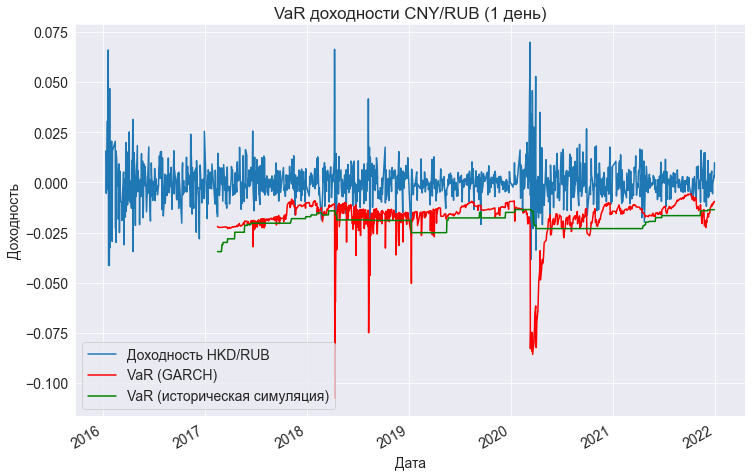

In [4]:
CNY_RUB.returns().plot(label='Доходность HKD/RUB')
(-CNY_RUB.value_at_risk()).plot(c='r', label='VaR (GARCH)')
(-CNY_RUB.value_at_risk(calc_func=calculate_historical)).plot(c='g', label='VaR (историческая симуляция)')
plt.title('VaR доходности CNY/RUB (1 день)')
plt.ylabel('Доходность')
plt.xlabel('Дата')
plt.legend()
plt.show()

### 10 дней

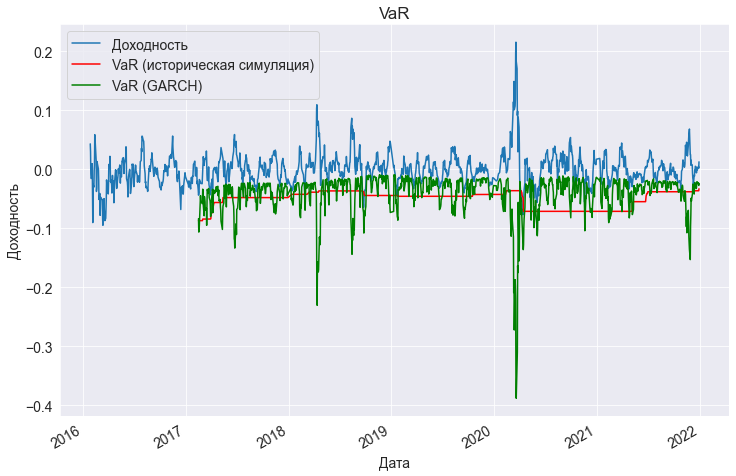

In [5]:
USD_RUB.plot_value_at_risk(periods=10)

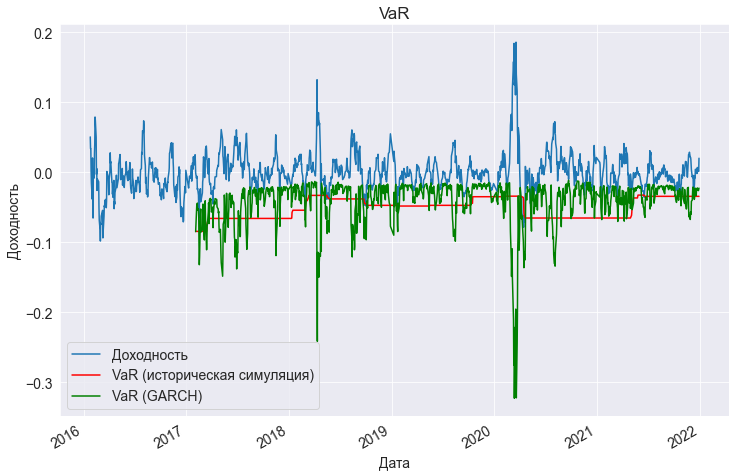

In [6]:
EUR_RUB.plot_value_at_risk(periods=10)

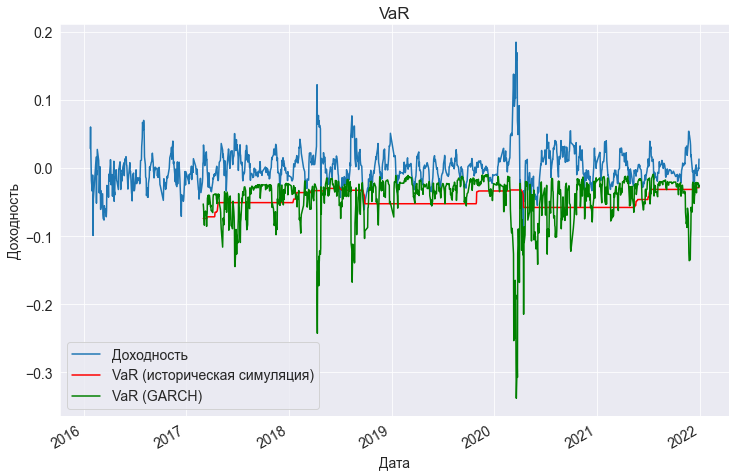

In [7]:
CNY_RUB.plot_value_at_risk(periods=10)

## Фьючерсы на Brent

In [10]:
brent = Brent()

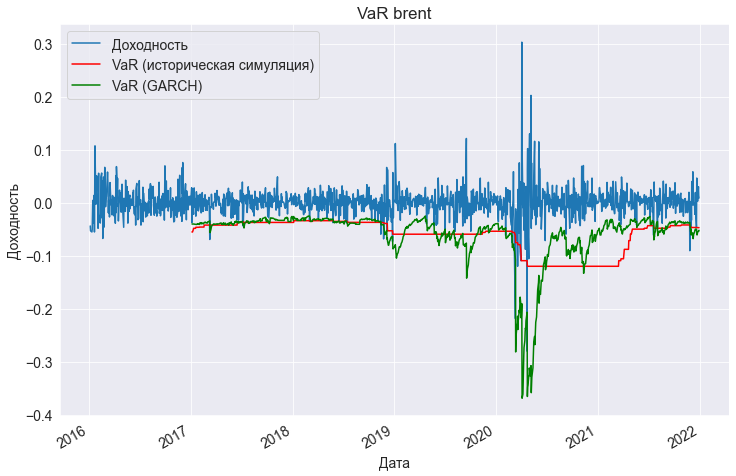

In [11]:
brent.plot_value_at_risk()

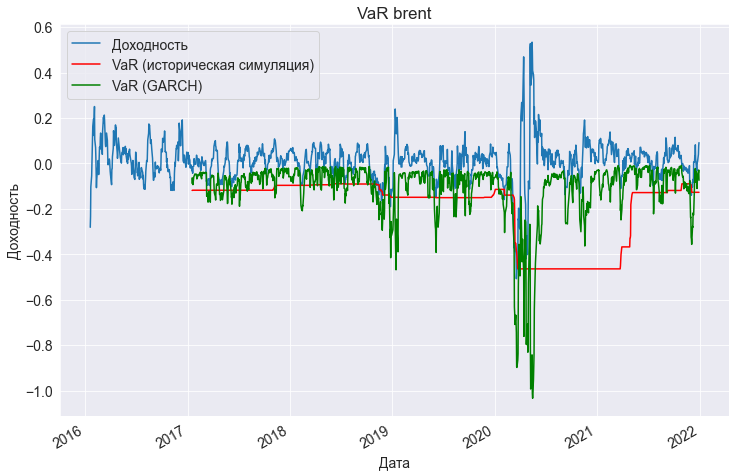

In [12]:
brent.plot_value_at_risk(periods=10)

## Ставки по депозитам

In [55]:
deposit_1y_to_3y = Deposit('RUB', '1y_to_3y')

12 1y_to_3y


/Users/germanarutunov/Projects/ftiad/venv/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07657. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/germanarutunov/Projects/ftiad/venv/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07757. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/germanarutunov/Projec

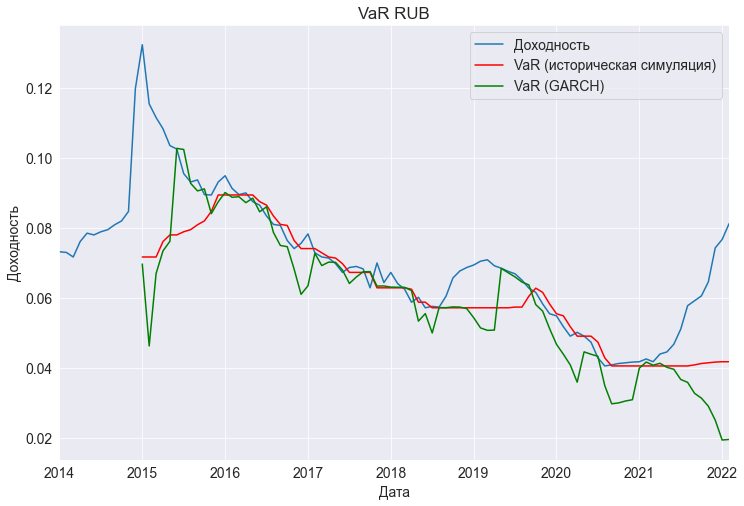

In [57]:
deposit_1y_to_3y.plot_value_at_risk(window_length=12)

### Акции

In [66]:
GAZP = Stock('GAZP')

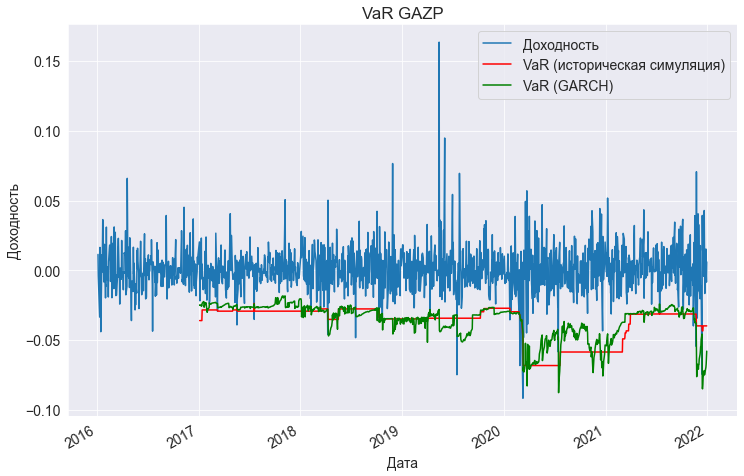

In [67]:
GAZP.plot_value_at_risk(periods=1)

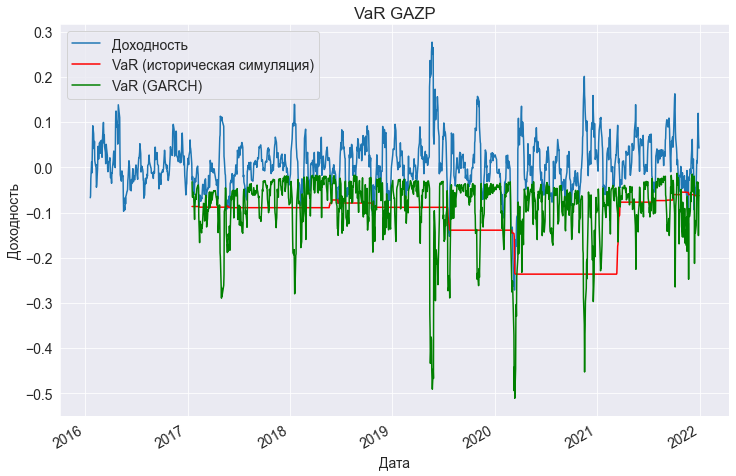

In [68]:
GAZP.plot_value_at_risk(periods=10)